# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop('Unnamed: 0', axis= 1, inplace= True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
display(heroes_df.describe())
powers_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Negasonic Teenage Warhead,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [6]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [7]:
# Find the columns with nan values
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [8]:
#Because there are a relative few rows with nan values, I will look at them first.
print(heroes_df['Weight'].unique())
print(heroes_df['Weight'].describe())
heroes_df[heroes_df['Weight'].isnull()]

[441.  65.  90. -99. 122.  88.  61.  81. 104. 108.  72. 169. 173. 101.
  68.  57.  54.  83.  86. 358. 135. 106. 146.  63.  98. 270.  59.  50.
 126.  67. 180.  77.  52.  95.  79. 133. 181. 216.  71. 124. 155. 113.
  58.  92.  97.  56. 230. 495.  55. 110.  99. 158.  74. 116.  62. 170.
  70.  78. 225. 817.  27.  91. 178. 383. 171. 187. 132.  89. 412. 306.
  80. 203.  96.  18.  45. 167.  16. 630. 268.  nan 115.   4.  48. 119.
 207. 191.   2.  14.  49. 855. 356. 324. 360. 288. 236.  36. 140. 128.
 338. 248. 125.  85. 293.  69. 405. 117.  87. 234. 320.  38.  25. 900.
 310. 149. 315. 153. 437. 131.  47. 176. 198. 443. 143.  76.  82. 105.
 331. 214.  73. 334.  41. 162.  39. 473.  51.  17.]
count    732.000000
mean      43.855191
std      130.823733
min      -99.000000
25%      -99.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


My investigation has led to two things: 

1) With a std of 130 and a mean of only 43 it seems inappropriate to simply impute a measure of central tendency to the nan values. This is especially true when observing the entries themselves. I know that both Godzilla and King Kong are unlikely to weigh the same as the mean of the data, so simply removing the entries seems more appropriate.

2) Perusing the unique values list sparks an interest in what the value -99 might mean. Weight should not be below 0. I'll take a look those after I drop the Godzilla and King Kong rows.

In [9]:
heroes_df.drop([286, 389], axis= 0, inplace= True)
heroes_df[heroes_df['Weight'].isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [10]:
# Successful! Good bye Godzilla and King Kong :(
display(heroes_df[heroes_df['Weight'] == -99].info())
heroes_df[heroes_df['Weight'] == -99]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 4 to 730
Data columns (total 10 columns):
name          237 non-null object
Gender        237 non-null object
Eye color     237 non-null object
Race          237 non-null object
Hair color    237 non-null object
Height        237 non-null float64
Publisher     225 non-null object
Skin color    237 non-null object
Alignment     237 non-null object
Weight        237 non-null float64
dtypes: float64(2), object(8)
memory usage: 20.4+ KB


None

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
712,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
713,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
723,Wondra,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0


It seems that the -99 value is being used as a placeholder. With 237 entries utilizing this placeholder, I'll need to use a different stategy to deal with it. I'll deal with placeholders later, for now there are still nans in the Publisher column to deal with. 

Note: the height column uses the same placeholder. 

In [11]:
print(heroes_df['Publisher'].unique())
print(heroes_df['Publisher'].describe())
heroes_df[heroes_df['Publisher'].isnull()]

['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'NBC - Heroes'
 'Wildstorm' 'Image Comics' nan 'Icon Comics' 'SyFy' 'Hanna-Barbera'
 'George Lucas' 'Team Epic TV' 'South Park' 'HarperCollins' 'ABC Studios'
 'Universal Studios' 'Star Trek' 'IDW Publishing' 'Shueisha'
 'Sony Pictures' 'J. K. Rowling' 'Titan Books' 'Rebellion' 'Microsoft'
 'J. R. R. Tolkien']
count               719
unique               24
top       Marvel Comics
freq                388
Name: Publisher, dtype: object


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


In [12]:
# Judging by the list, it seems many of these characters are from publishers that only created a single character. I will
# rename these publishers as 'Independent' in order to preserve as much data as possible. 

heroes_df.loc[heroes_df['Publisher'].isnull(), 'Publisher'] = 'Independent'
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 733
Data columns (total 10 columns):
name          732 non-null object
Gender        732 non-null object
Eye color     732 non-null object
Race          732 non-null object
Hair color    732 non-null object
Height        732 non-null float64
Publisher     732 non-null object
Skin color    732 non-null object
Alignment     732 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 62.9+ KB


There are no more null values! Next, to deal with placeholders before moving on to the powers dataframe.

In [13]:
# I'll write a function to return the usefull information that can help find outliers. 

def checkcells(col):
    print(col.value_counts().head())
    print(col.nunique())
    print(col.unique()[:10])

In [14]:
checkcells(heroes_df['name'])

Goliath       3
Spider-Man    3
Blizzard      2
Firestorm     2
Batman        2
Name: name, dtype: int64
713
['A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas' 'Absorbing Man'
 'Adam Monroe' 'Adam Strange' 'Agent 13' 'Agent Bob']


Names shouldn't have duplicates! I'll check to see if there's a reason these heroes have multiple entries. 

In [15]:
display(heroes_df[heroes_df.duplicated('name')])
display(heroes_df[heroes_df.duplicated()])

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
116,Blizzard,Male,-,-,Brown,-99.0,Marvel Comics,-,bad,-99.0
123,Blue Beetle,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0
260,Firestorm,Male,blue,Human,Auburn,188.0,DC Comics,-,good,91.0


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


Because these characters come from different companies it makes sense that some would have the same name. Comic book characters travel between dimensions, so it makes sense that multiple versions exist, but there are two identical Goliath entries, so I'll drop 1.

In [16]:
heroes_df.name.drop(291, axis= 0, inplace= True)

In [17]:
checkcells(heroes_df['Gender'])

Male      504
Female    200
-          28
Name: Gender, dtype: int64
3
['Male' 'Female' '-']


In [18]:
heroes_df[heroes_df['Gender'] == '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
87,Bird-Brain,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
112,Blaquesmith,-,black,-,No Hair,-99.0,Marvel Comics,-,good,-99.0
133,Box III,-,blue,-,Blond,193.0,Marvel Comics,-,good,110.0
134,Box IV,-,brown,-,Brown / Black,-99.0,Marvel Comics,-,good,-99.0
160,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0
165,Cecilia Reyes,-,brown,-,Brown,170.0,Marvel Comics,-,good,62.0
178,Clea,-,-,-,White,-99.0,Marvel Comics,-,good,-99.0
196,Cypher,-,blue,-,Blond,175.0,Marvel Comics,-,good,68.0
204,Darkside,-,-,-,-,-99.0,Independent,-,bad,-99.0
234,Ego,-,-,-,-,-99.0,Marvel Comics,-,bad,-99.0


The '-' is used as a placeholder. Because many of these characters are named Spider-man, Man of Miracles, Shadow King etc. it makes sense to impute the value 'male' for most of this data. Just by looking at it, I see two female names, so I'll make them female separately.   

In [19]:
heroes_df.loc[heroes_df.iloc[165]['Gender'], 'Gender']= 'Female'
heroes_df.loc[heroes_df.iloc[178]['Gender'], 'Gender']= 'Female'

In [20]:
heroes_df.loc[heroes_df['Gender']== '-', 'Gender']= 'Male'
checkcells(heroes_df['Gender'])

Male      532
Female    201
Name: Gender, dtype: int64
2
['Male' 'Female']


In lieu of gathering more information regarding the gender identity of these heroes, this is the best we can do.

In [21]:
checkcells(heroes_df['Eye color'])

blue     225
-        171
brown    126
green     73
red       46
Name: Eye color, dtype: int64
23
['yellow' 'blue' 'green' 'brown' '-' 'red' 'violet' 'white' 'purple'
 'black']


In [22]:
heroes_df[heroes_df['Eye color']== '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
697,Violator,Male,-,-,-,-99.0,Image Comics,-,bad,-99.0
711,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
712,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0


In [23]:
heroes_df['Eye color'].value_counts(normalize= True)

blue                       0.307377
-                          0.233607
brown                      0.172131
green                      0.099727
red                        0.062842
black                      0.031421
yellow                     0.024590
white                      0.023224
hazel                      0.008197
grey                       0.008197
purple                     0.005464
gold                       0.004098
amber                      0.002732
violet                     0.002732
yellow (without irises)    0.002732
white / red                0.001366
blue / white               0.001366
yellow / blue              0.001366
green / blue               0.001366
silver                     0.001366
indigo                     0.001366
yellow / red               0.001366
bown                       0.001366
Name: Eye color, dtype: float64

We dont know about 23% of these characters eye color. I'll impute the value 'Unknown' because it is possible that these characters are simply mysterious, or the actors that play them change.

In [24]:
heroes_df.loc[heroes_df['Eye color']== '-', 'Eye color']= 'Unknown'

In [25]:
checkcells(heroes_df['Race'])

-                304
Human            208
Mutant            63
God / Eternal     14
Cyborg            11
Name: Race, dtype: int64
61
['Human' 'Icthyo Sapien' 'Ungaran' 'Human / Radiation' 'Cosmic Entity' '-'
 'Cyborg' 'Xenomorph XX121' 'Android' 'Vampire']


In [26]:
display(heroes_df[heroes_df['Race']== '-'])
heroes_df.loc[heroes_df['Race']!= '-']['Race'].value_counts(normalize= True)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
10,Agent Zero,Male,Unknown,-,-,191.0,Marvel Comics,-,good,104.0
11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0
13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0
...,...,...,...,...,...,...,...,...,...,...
723,Wondra,Female,Unknown,-,-,-99.0,Marvel Comics,-,good,-99.0
724,Wyatt Wingfoot,Male,brown,-,Black,196.0,Marvel Comics,-,good,117.0
726,X-Man,Male,blue,-,Brown,175.0,Marvel Comics,-,good,61.0
727,Yellow Claw,Male,blue,-,No Hair,188.0,Marvel Comics,-,bad,95.0


Human                 0.485981
Mutant                0.147196
God / Eternal         0.032710
Cyborg                0.025701
Human / Radiation     0.025701
Symbiote              0.021028
Android               0.021028
Kryptonian            0.016355
Alien                 0.016355
Demon                 0.014019
Asgardian             0.011682
Atlantean             0.011682
Alpha                 0.011682
Cosmic Entity         0.009346
Inhuman               0.009346
Human / Altered       0.007009
New God               0.007009
Animal                0.007009
Metahuman             0.004673
Eternal               0.004673
Demi-God              0.004673
Human / Cosmic        0.004673
Frost Giant           0.004673
Saiyan                0.004673
Vampire               0.004673
Human-Kree            0.004673
Amazon                0.004673
Human-Vulcan          0.002336
Bolovaxian            0.002336
Planet                0.002336
Human-Vuldarian       0.002336
Martian               0.002336
Talokite

The mode (about half) of the non- '-' races are human, but because of the wide variety of races, it would be impractical to try to emulate those proportions for the '-' set. I'll use my judgement, and reason that non-human characters are typically identified by their race, whereas it may be assumed that a character is human somewhat by default. I'll fill the '-' values with human. 

In [27]:
heroes_df.loc[heroes_df['Race']== '-', 'Race']= 'Human'

checkcells(heroes_df['Hair color'])

-          171
Black      157
Blond       99
Brown       86
No Hair     75
Name: Hair color, dtype: int64
30
['No Hair' 'Black' 'Blond' 'Brown' '-' 'White' 'Purple' 'Orange' 'Pink'
 'Red']


In [28]:
heroes_df.loc[heroes_df['Hair color']!= '-']['Hair color'].value_counts(normalize= True)

Black               0.279857
Blond               0.176471
Brown               0.153298
No Hair             0.133690
Red                 0.090909
White               0.040998
Auburn              0.023173
Green               0.014260
Strawberry Blond    0.012478
Purple              0.008913
Grey                0.008913
Silver              0.007130
Brown / White       0.007130
Blue                0.005348
blond               0.005348
black               0.005348
Yellow              0.003565
Orange              0.003565
Magenta             0.001783
Brown / Black       0.001783
Gold                0.001783
Red / Orange        0.001783
Brownn              0.001783
Red / White         0.001783
Pink                0.001783
Black / Blue        0.001783
Red / Grey          0.001783
Orange / White      0.001783
Indigo              0.001783
Name: Hair color, dtype: float64

Some typos have created extra values where there shouldn't be. Ex: brownn should be part of the Brown group. I'll use this list to correct those errors before moving on. 

In [29]:
heroes_df.loc[heroes_df['Hair color'] == 'blond', ['Hair color']]= 'Blond'
heroes_df.loc[heroes_df['Hair color'] == 'black', ['Hair color']]= 'Black'
heroes_df.loc[heroes_df['Hair color'] == 'Brownn', ['Hair color']]= 'Brown'

In [30]:
heroes_df.loc[heroes_df['Hair color']!= '-']['Hair color'].value_counts(normalize= True)

Black               0.285205
Blond               0.181818
Brown               0.155080
No Hair             0.133690
Red                 0.090909
White               0.040998
Auburn              0.023173
Green               0.014260
Strawberry Blond    0.012478
Grey                0.008913
Purple              0.008913
Silver              0.007130
Brown / White       0.007130
Blue                0.005348
Orange              0.003565
Yellow              0.003565
Magenta             0.001783
Brown / Black       0.001783
Gold                0.001783
Red / White         0.001783
Pink                0.001783
Black / Blue        0.001783
Red / Grey          0.001783
Orange / White      0.001783
Red / Orange        0.001783
Indigo              0.001783
Name: Hair color, dtype: float64

With typos corrected it's time to address the '-' values.

In [31]:
heroes_df[heroes_df['Hair color']== '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
10,Agent Zero,Male,Unknown,Human,-,191.0,Marvel Comics,-,good,104.0
14,Alex Mercer,Male,Unknown,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,Unknown,Human,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,Unknown,Human,-,-99.0,Wildstorm,-,good,-99.0
19,Amazo,Male,red,Android,-,257.0,DC Comics,-,bad,173.0
...,...,...,...,...,...,...,...,...,...,...
697,Violator,Male,Unknown,Human,-,-99.0,Image Comics,-,bad,-99.0
711,Watcher,Male,Unknown,Human,-,-99.0,Marvel Comics,-,good,-99.0
712,Weapon XI,Male,Unknown,Human,-,-99.0,Marvel Comics,-,bad,-99.0
715,Wildfire,Male,Unknown,Human,-,-99.0,DC Comics,-,good,-99.0


With 171 entries of '-' for hair color and no overwhelming mode, deciding on a replacement value is difficult. However, to relatively maintain the distribution of the data I will impute the top five hair colors by their proportion in the rest of the data.

In [32]:
rel_hair_prob = [.285, .182, .155, .134, .09]
hair_prob = [i/sum(rel_hair_prob) for i in rel_hair_prob]
def impute_by_prop(value):
    if value == '-':
        return np.random.choice(['Black', 'Blond', 'Brown', 'No Hair', 'Red'], p= hair_prob)
    else:
        return value
heroes_df['Hair color'] = heroes_df['Hair color'].map(lambda x: impute_by_prop(x))
checkcells(heroes_df['Hair color'])
display(heroes_df['Hair color'].value_counts(normalize= True))

Black      212
Brown      135
Blond      133
No Hair     96
Red         70
Name: Hair color, dtype: int64
26
['No Hair' 'Black' 'Blond' 'Brown' 'Red' 'White' 'Purple' 'Orange' 'Pink'
 'Auburn']


Black               0.289617
Brown               0.184426
Blond               0.181694
No Hair             0.131148
Red                 0.095628
White               0.031421
Auburn              0.017760
Green               0.010929
Strawberry Blond    0.009563
Purple              0.006831
Grey                0.006831
Brown / White       0.005464
Silver              0.005464
Blue                0.004098
Yellow              0.002732
Orange              0.002732
Brown / Black       0.001366
Black / Blue        0.001366
Red / White         0.001366
Pink                0.001366
Red / Grey          0.001366
Orange / White      0.001366
Red / Orange        0.001366
Gold                0.001366
Magenta             0.001366
Indigo              0.001366
Name: Hair color, dtype: float64

Considering that the proportions of hair color remained roughly the same, it appears that this method was successful.

In [33]:
checkcells(heroes_df['Height'])

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
Name: Height, dtype: int64
53
[203. 191. 185. -99. 193. 173. 178. 188. 180. 244.]


In [34]:
heroes_df.loc[heroes_df['Height']== -99]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,Human,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,Unknown,Human,Black,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,Unknown,Human,Blond,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,Unknown,Human,No Hair,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
711,Watcher,Male,Unknown,Human,Black,-99.0,Marvel Comics,-,good,-99.0
712,Weapon XI,Male,Unknown,Human,Red,-99.0,Marvel Comics,-,bad,-99.0
713,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
715,Wildfire,Male,Unknown,Human,Brown,-99.0,DC Comics,-,good,-99.0


A relatively large proportion of the data contains the value -99 as a placeholder. To choose a strategy for dealing with this I will begin by checking looking at how the data is dispersed.

In [35]:
heroes_df['Height'].describe()

count    732.000000
mean     102.344262
std      139.790036
min      -99.000000
25%      -99.000000
50%      175.000000
75%      185.000000
max      975.000000
Name: Height, dtype: float64

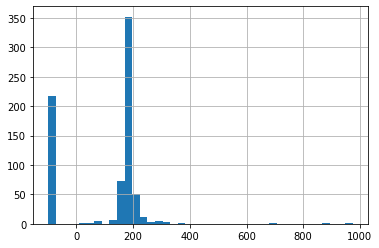

In [36]:
heroes_df['Height'].hist(bins= 40)

The median value is by far the most frequent value. It is appropriate to impute it onto the placeholder values.

In [37]:
heroes_df.loc[heroes_df['Height']== -99, 'Height']= heroes_df['Height'].median()
heroes_df['Height'].describe()

count    732.000000
mean     183.571038
std       49.670775
min       15.200000
25%      175.000000
50%      175.000000
75%      185.000000
max      975.000000
Name: Height, dtype: float64

In [38]:
checkcells(heroes_df['Publisher'])

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Name: Publisher, dtype: int64
25
['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'NBC - Heroes'
 'Wildstorm' 'Image Comics' 'Independent' 'Icon Comics' 'SyFy'
 'Hanna-Barbera']


In [39]:
checkcells(heroes_df['Skin color'])
heroes_df['Skin color'].value_counts(normalize= True)

-        661
green     21
red        9
blue       9
white      7
Name: Skin color, dtype: int64
17
['-' 'blue' 'red' 'black' 'grey' 'gold' 'green' 'white' 'pink' 'silver']


-                 0.903005
green             0.028689
red               0.012295
blue              0.012295
white             0.009563
silver            0.006831
grey              0.005464
purple            0.004098
gold              0.004098
pink              0.002732
yellow            0.002732
black             0.001366
blue-white        0.001366
gray              0.001366
orange / white    0.001366
red / black       0.001366
orange            0.001366
Name: Skin color, dtype: float64

90% of the values for skin color are '-'. This data won't be very useful, so I'll drop the column.

In [40]:
heroes_df.drop('Skin color', axis=1, inplace= True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,-99.0


In [41]:
checkcells(heroes_df['Alignment'])

good       495
bad        206
neutral     24
-            7
Name: Alignment, dtype: int64
4
['good' 'bad' '-' 'neutral' nan]


In [42]:
heroes_df['Alignment'].isna().sum()

1

In [43]:
heroes_df[heroes_df['Alignment'].isnull()]

#I'm completely unsure how I didn't see this before.

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
-,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
heroes_df.dropna()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,-99.0
...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,good,57.0


In [45]:
heroes_df.loc[heroes_df['Alignment']== '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
33,Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,-,358.0
110,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,-,88.0
138,Brundlefly,Male,Unknown,Mutant,Black,193.0,Independent,-,-99.0
426,Man of Miracles,Male,blue,God / Eternal,Silver,175.0,Image Comics,-,-99.0
535,Q,Male,Unknown,God / Eternal,Brown,175.0,Star Trek,-,-99.0
676,Trickster,Male,blue,Human,Blond,183.0,DC Comics,-,81.0
692,Venompool,Male,Unknown,Symbiote,Red,226.0,Marvel Comics,-,-99.0


In [46]:
#Because this group represents less than 1% of the data, I'll simply drop it. 
heroes_df.drop([33, 110, 138, 426, 535, 676, 692], axis=0, inplace=True)

In [47]:
checkcells(heroes_df['Weight'])

-99.0    233
 79.0     23
 54.0     23
 81.0     21
 90.0     19
Name: Weight, dtype: int64
134
[441.  65.  90. -99. 122.  88.  61.  81. 104. 108.]


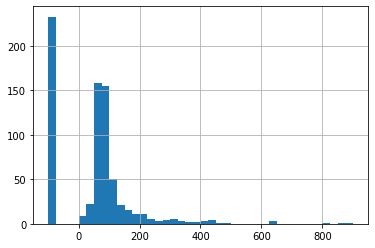

In [48]:
heroes_df['Weight'].hist(bins= 40)

The pattern shows a similar approach to how I dealt with height will be effective.

In [49]:
heroes_df.loc[heroes_df['Weight']== -99]= heroes_df['Weight'].median()

In [50]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 726 entries, 0 to -
Data columns (total 9 columns):
name          725 non-null object
Gender        726 non-null object
Eye color     725 non-null object
Race          725 non-null object
Hair color    725 non-null object
Height        725 non-null float64
Publisher     725 non-null object
Alignment     725 non-null object
Weight        725 non-null float64
dtypes: float64(2), object(7)
memory usage: 56.7+ KB


That's all for the heroes_df dataframe. On to powers_df!

In [51]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [52]:
powers_df[powers_df.duplicated()]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


There are zero duplicates. That's a good sign.

In [54]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
(powers_df.isnull().sum()).sum()
# since the list is so long, and I just need to know if there are nulls, I summed the sum. 0 will mean there are no nulls.

0

Values in this dataframe are all booleans. I'll check for placeholders by seeing if there are any non-boolean values.

In [78]:
for col in powers_df.columns:
    if powers_df[col].nunique() > 2 or powers_df[col].nunique() < 2:
        print('The {} column contains non-boolean values'.format(col))
    else:
        continue

The hero_names column contains non-boolean values


As it should. This data set is ready for the next step!

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [79]:
heroes_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Alignment', 'Weight'],
      dtype='object')

In [80]:
powers_df.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

In [82]:
powers_df.rename(columns= {'hero_names': 'Name'}, inplace=True)
heroes_df.rename(columns= {'name': 'Name'}, inplace=True)
display(heroes_df.columns)
display(powers_df.columns)

Index(['Name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Alignment', 'Weight'],
      dtype='object')

Index(['Name', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

In [88]:
super_heroes = heroes_df.set_index('Name').join(powers_df.set_index('Name'), how='inner')
super_heroes.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

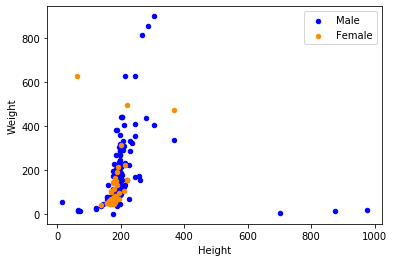

In [91]:
male_heroes = super_heroes[super_heroes['Gender']== 'Male']
female_heroes = super_heroes[super_heroes['Gender']== 'Female']

male_plot = male_heroes.plot.scatter(x='Height', y='Weight', c='b', label='Male')
female_heroes.plot.scatter(x='Height', y='Weight', c='darkorange', label='Female', ax=male_plot)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [94]:
import seaborn as sns

def show_distplot(dataframe, gender, column_name):
    temp_df = dataframe.loc[dataframe['Gender']==gender]
    sns.distplot(a=temp_df[column_name])    

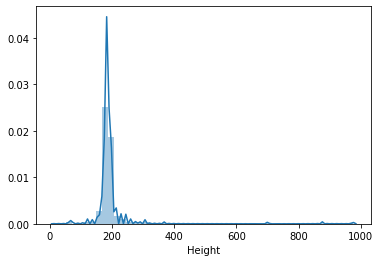

In [95]:
# Male Height
show_distplot(super_heroes, 'Male', 'Height')

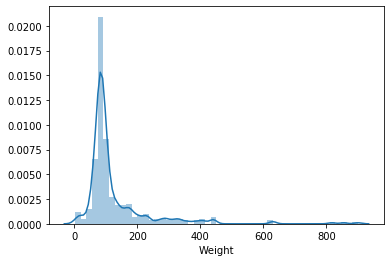

In [96]:
# Male Weight
show_distplot(super_heroes, 'Male', 'Weight')

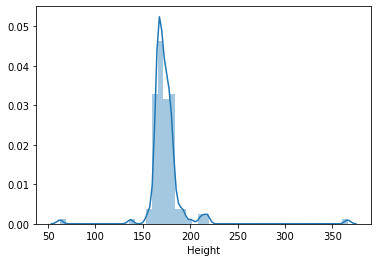

In [97]:
# Female Height
show_distplot(super_heroes, 'Female', 'Height')

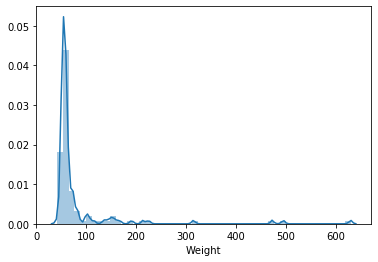

In [98]:
# Female Weight
show_distplot(super_heroes, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



The shapes of the distributions show that most of the values are clumped around the median and mean values, with some very large values giving the distribution a right tail. Aside from a few characters, the vast majority of heights and weights are relatively similar.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [140]:
def top_5_powers(dataframe):
    super_powers = dataframe.drop(['Gender', 'Eye color', 
                                      'Race', 'Hair color', 
                                      'Height', 'Publisher', 
                                      'Alignment', 'Weight'], axis=1)

    power_dict = dict(super_powers.sum())
    return sorted(power_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    
top_5_powers(super_heroes)

[('Super Strength', 276),
 ('Stamina', 231),
 ('Durability', 209),
 ('Super Speed', 199),
 ('Agility', 196)]

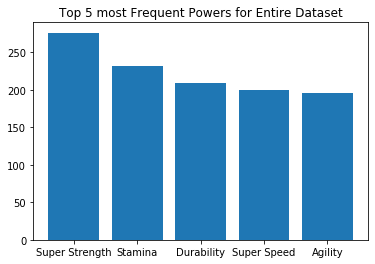

In [153]:
def top_5_power_chart(dataframe, group='Entire Dataset'):
    x = [tup[0] for tup in top_5_powers(dataframe)]
    y = [tup[1] for tup in top_5_powers(dataframe)]
    
    plt.clf()
    plt.bar(x=x,height=y)
    plt.title('Top 5 most Frequent Powers for {}'.format(group))
    plt.show()
    
top_5_power_chart(super_heroes)

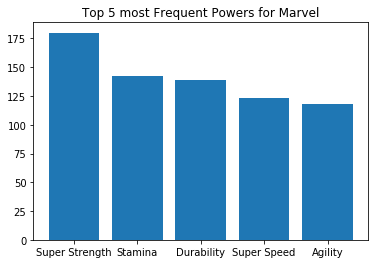

In [157]:
top_5_power_chart(super_heroes.loc[super_heroes['Publisher']=='Marvel Comics'], group='Marvel')

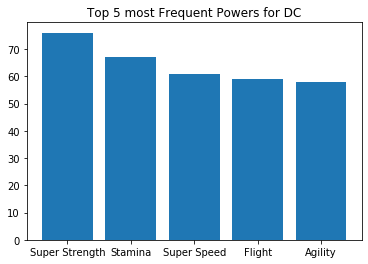

In [158]:
top_5_power_chart(super_heroes.loc[super_heroes['Publisher']=='DC Comics'], group='DC')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data